In [1]:
### データのimportと整形
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [2]:
import warnings
warnings.simplefilter('ignore')

In [3]:
# ファイルの読み込み
df_jp_ind = pd.read_csv('./csv_data/雇用_医療福祉_一人当たり賃金_全国_全産業.csv', encoding='shift_jis')
df_jp_category = pd.read_csv('./csv_data/雇用_医療福祉_一人当たり賃金_全国_大分類.csv', encoding='shift_jis')
df_pref_ind = pd.read_csv('./csv_data/雇用_医療福祉_一人当たり賃金_都道府県_全産業.csv', encoding='shift_jis')
df_pref_category = pd.read_csv('./csv_data/雇用_医療福祉_一人当たり賃金_都道府県_大分類.csv', encoding='shift_jis')

In [4]:
# データ概要の確認
print('===== データサイズ\n', df_jp_ind.shape)
print('===== index\n', df_jp_ind.index)
print('===== カラム名\n', df_jp_ind.columns)
print('===== データ型\n', df_jp_ind.dtypes)
df_jp_ind.tail()

===== データサイズ
 (130, 5)
===== index
 RangeIndex(start=0, stop=130, step=1)
===== カラム名
 Index(['集計年', '年齢', '所定内給与額（万円）', '年間賞与その他特別給与額（万円）', '一人当たり賃金（万円）'], dtype='object')
===== データ型
 集計年                   int64
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object


,集計年,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
125,2019,50〜54歳,37.3461,131.3868,579.5403
126,2019,55〜59歳,36.7154,125.9454,566.5306
127,2019,60〜64歳,28.3014,68.4050,408.0213
128,2019,65〜69歳,24.9037,39.3509,338.1952
129,2019,70歳〜,23.7553,24.4497,309.5137


In [5]:
# ユニーク値の確認
df_pref_category['産業大分類名'].unique()

array(['鉱業，採石業，砂利採取業', '建設業', '製造業', '電気・ガス・熱供給・水道業', '情報通信業', '運輸業，郵便業',
       '卸売業，小売業', '金融業，保険業', '不動産業，物品賃貸業', '学術研究，専門・技術サービス業',
       '宿泊業，飲食サービス業', '生活関連サービス業，娯楽業', '教育，学習支援業', '医療，福祉', '複合サービス事業',
       'サービス業（他に分類されないもの）'], dtype=object)

In [6]:
df_pref_category['産業大分類名'].nunique()

16

In [7]:
# 重複データの確認
df_jp_ind.duplicated().any()

False

In [8]:
df_pref_category.dtypes

集計年                  int64
都道府県コード              int64
都道府県名               object
産業大分類コード            object
産業大分類名              object
年齢                  object
所定内給与額（万円）          object
年間賞与その他特別給与額（万円）    object
一人当たり賃金（万円）         object
dtype: object

In [9]:
# 欠損値の確認
df_jp_ind.isnull().sum()

集計年                 0
年齢                  0
所定内給与額（万円）          0
年間賞与その他特別給与額（万円）    0
一人当たり賃金（万円）         0
dtype: int64

In [10]:
# (金額項目のオブジェクト型をstr型に変換する必要があるため)特定文字列の抽出と置換
df_pref_category[df_pref_category['所定内給与額（万円）'] == '-']

df_pref_category['所定内給与額（万円）'] = df_pref_category['所定内給与額（万円）'].replace('-', np.nan)
df_pref_category['一人当たり賃金（万円）'] = df_pref_category['一人当たり賃金（万円）'].replace('-', np.nan)
df_pref_category['年間賞与その他特別給与額（万円）'] = df_pref_category['年間賞与その他特別給与額（万円）'].replace('-', np.nan)

In [11]:
# 欠損値の処理
# そのままにする/欠損行の削除/別の値で保管する
# 今回は欠損行の割合が少ないため削除対応とする
df_pref_category.dropna(subset=['所定内給与額（万円）'], axis=0, inplace=True)

In [12]:
# データ型の変換
df_pref_category = df_pref_category.astype({'所定内給与額（万円）': float, '一人当たり賃金（万円）': float, '年間賞与その他特別給与額（万円）': float})
df_pref_category.dtypes

集計年                   int64
都道府県コード               int64
都道府県名                object
産業大分類コード             object
産業大分類名               object
年齢                   object
所定内給与額（万円）          float64
年間賞与その他特別給与額（万円）    float64
一人当たり賃金（万円）         float64
dtype: object

In [13]:
# 条件抽出(複数条件)
df_pref_category[(df_pref_category['一人当たり賃金（万円）'] > 900) & (df_pref_category['都道府県名'] == '東京都')]

,集計年,都道府県コード,都道府県名,産業大分類コード,産業大分類名,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
2503,2010,13,東京都,C,鉱業，採石業，砂利採取業,45〜49歳,58.88,341.39,1047.95
2504,2010,13,東京都,C,鉱業，採石業，砂利採取業,50〜54歳,66.59,415.81,1214.89
2505,2010,13,東京都,C,鉱業，採石業，砂利採取業,55〜59歳,68.96,432.67,1260.19
2556,2010,13,東京都,G,情報通信業,50〜54歳,64.22,207.55,978.19
2557,2010,13,東京都,G,情報通信業,55〜59歳,60.30,182.65,906.25
...,...,...,...,...,...,...,...,...,...
90606,2019,13,東京都,L,学術研究，専門・技術サービス業,55〜59歳,55.29,242.54,906.02
90644,2019,13,東京都,O,教育，学習支援業,50〜54歳,58.58,271.15,974.11
90645,2019,13,東京都,O,教育，学習支援業,55〜59歳,63.57,301.49,1064.33
90646,2019,13,東京都,O,教育，学習支援業,60〜64歳,62.22,306.26,1052.90


In [15]:
font_path = 'TakaoPGothic.ttf'
font_property = FontProperties(fname=font_path)

In [24]:
df_ts_mean = df_jp_ind[(df_jp_ind["年齢"] == "年齢計")]
df_ts_mean = df_ts_mean.set_index('集計年')
df_ts_mean

,年齢,所定内給与額（万円）,年間賞与その他特別給与額（万円）,一人当たり賃金（万円）
集計年,,,,
2010,年齢計,29.6219,79.1174,434.5804
2011,年齢計,29.6784,82.3747,438.5151
2012,年齢計,29.7757,81.9302,439.2385
2013,年齢計,29.5735,80.1316,435.0136
2014,年齢計,29.9630,84.1634,443.7198
2015,年齢計,30.4022,89.2692,454.0960
2016,年齢計,30.3988,89.4192,454.2043
2017,年齢計,30.4291,90.5953,455.7445
2018,年齢計,30.6196,93.1651,460.6006


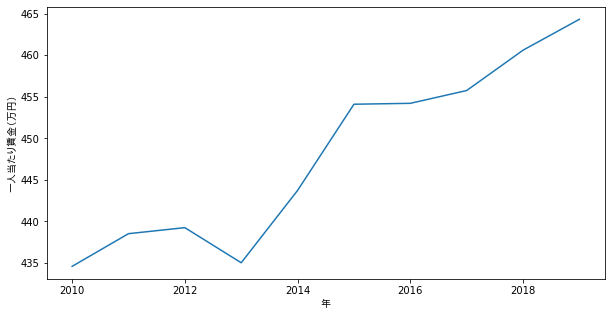

In [30]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_xlabel('年', fontproperties=font_property)
ax.set_ylabel('一人当たり賃金（万円）', fontproperties=font_property)
ax.plot(df_ts_mean['一人当たり賃金（万円）'])
plt.show()

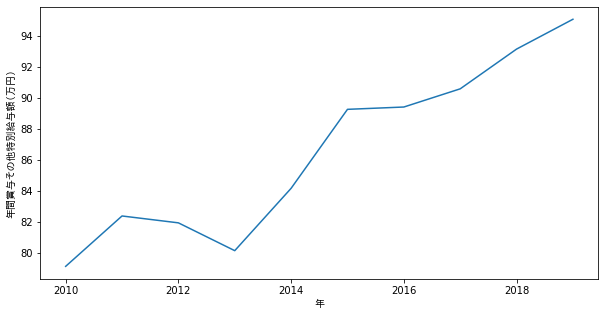

In [31]:
fig = plt.figure(figsize=(10,5))
ax = plt.axes()
ax.set_xlabel('年', fontproperties=font_property)
ax.set_ylabel('年間賞与その他特別給与額（万円）', fontproperties=font_property)
ax.plot(df_ts_mean['年間賞与その他特別給与額（万円）'])
plt.show()

In [33]:
print(df_pref_category.head())

    集計年  都道府県コード 都道府県名 産業大分類コード        産業大分類名      年齢  所定内給与額（万円）  \
0  2010        1   北海道        C  鉱業，採石業，砂利採取業     年齢計       28.85   
1  2010        1   北海道        C  鉱業，採石業，砂利採取業    〜19歳       18.84   
2  2010        1   北海道        C  鉱業，採石業，砂利採取業  20〜24歳       21.13   
3  2010        1   北海道        C  鉱業，採石業，砂利採取業  25〜29歳       25.25   
4  2010        1   北海道        C  鉱業，採石業，砂利採取業  30〜34歳       24.54   

   年間賞与その他特別給与額（万円）  一人当たり賃金（万円）  
0             74.95       421.15  
1             19.88       245.96  
2             89.56       343.12  
3             83.94       386.94  
4             66.53       361.01  


In [35]:
age_list = df_pref_category['年齢'].unique()


['年齢計' '〜19歳' '20〜24歳' '25〜29歳' '30〜34歳' '35〜39歳' '40〜44歳' '45〜49歳'
 '50〜54歳' '55〜59歳' '60〜64歳' '65〜69歳' '70歳〜']


In [45]:
wage_list = []
for age in age_list:
    wage_temp = df_pref_category[df_pref_category['年齢'] == age]['一人当たり賃金（万円）'].values.tolist()
    wage_list.append(wage_temp)

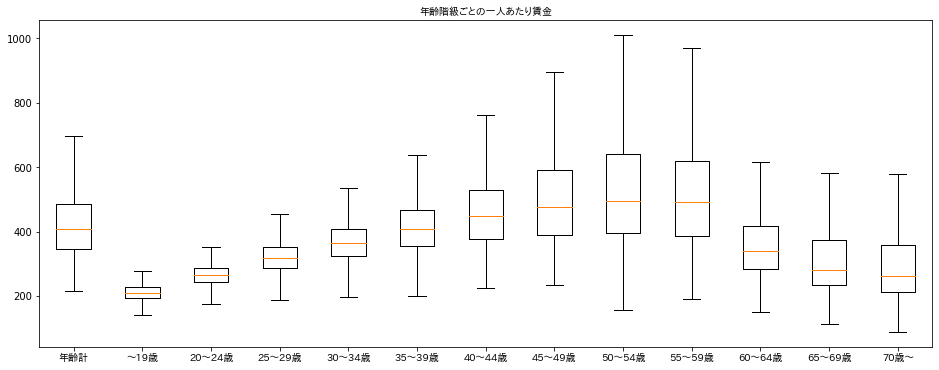

In [51]:
fig = plt.figure(figsize=(16,6))
ax = plt.axes()
ax.set_title('年齢階級ごとの一人あたり賃金', fontproperties=font_property)
ax.set_xticklabels(age_list, fontproperties=font_property)
ax.boxplot(wage_list, showfliers=False)
plt.show()

In [53]:
ind_list = df_pref_category['産業大分類名'].unique()
ind_list

array(['鉱業，採石業，砂利採取業', '建設業', '製造業', '電気・ガス・熱供給・水道業', '情報通信業', '運輸業，郵便業',
       '卸売業，小売業', '金融業，保険業', '不動産業，物品賃貸業', '学術研究，専門・技術サービス業',
       '宿泊業，飲食サービス業', '生活関連サービス業，娯楽業', '教育，学習支援業', '医療，福祉', '複合サービス事業',
       'サービス業（他に分類されないもの）'], dtype=object)

In [65]:
wage_list2 = []
for ind in ind_list:
    ind_temp = df_pref_category[df_pref_category['産業大分類名'] == ind]['一人当たり賃金（万円）'].values.tolist()
    wage_list2.append(ind_temp)

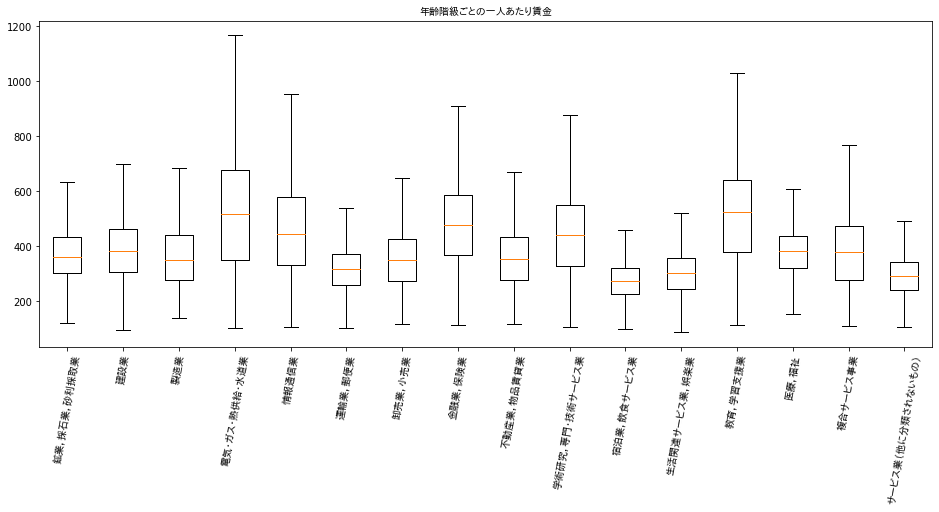

In [66]:
fig = plt.figure(figsize=(16,6))
ax = plt.axes()
ax.set_title('年齢階級ごとの一人あたり賃金', fontproperties=font_property)
ax.set_xticklabels(ind_list, fontproperties=font_property, rotation=80)
ax.boxplot(wage_list2, showfliers=False)
plt.show()